<a href="https://colab.research.google.com/github/IrfhanAhmedh/Reservoir-Simulator-1D-2D-/blob/main/IMPES_1D_Displacement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

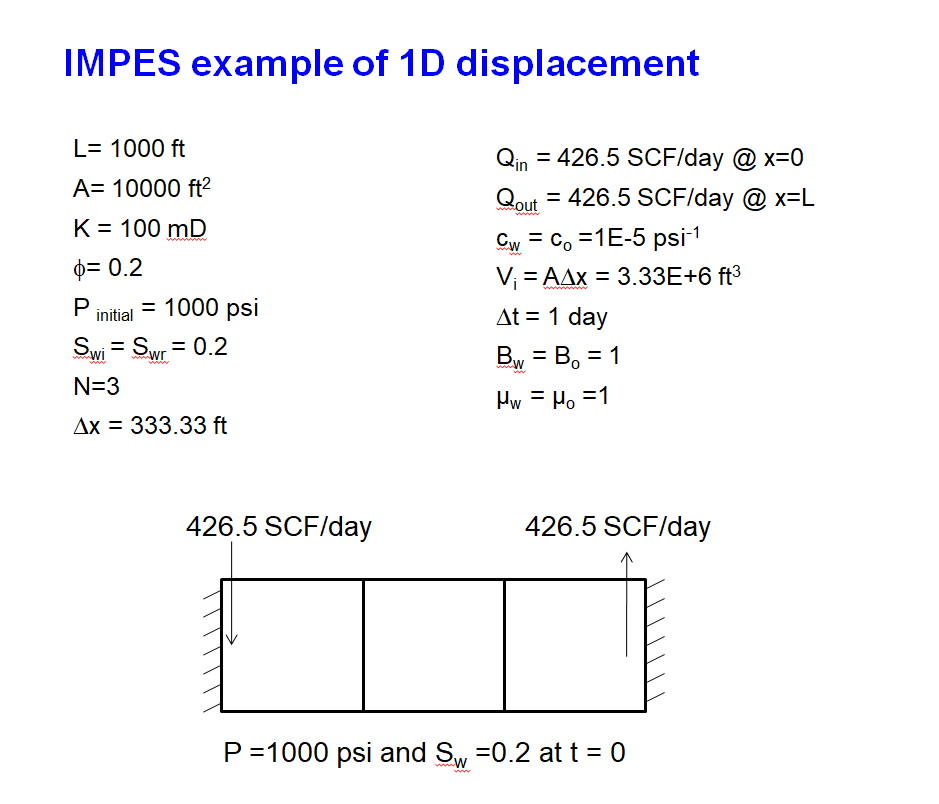

In [113]:
import numpy as np
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import matplotlib as mpl

In [114]:
n=10 #number of grids (solved using 10 grids and we can change it to 3 if needed ie n=3)
swi=0.2
swr=0.2

Setting up the required array

In [115]:
sw=np.arange(n)*0+0.2
krwhalf=np.arange(n+1)*0
krwhalf=krwhalf.astype(float)
krohalf=np.arange(n+1)*0
krohalf=krohalf.astype(float)
p_initial=np.arange(n).reshape(n,1)*0+1000
Q=np.arange(n).reshape(n,1)*0
thalfwater=np.arange(n+1)*0
thalfwater=thalfwater.astype(float)
thalfoil=np.arange(n+1)*0
thalfoil=thalfoil.astype(float)
Tw=np.arange(n*n).reshape(n,n)*0
Tw=Tw.astype(float)
To=np.arange(n*n).reshape(n,n)*0
D=np.arange(n*n).reshape(n,n)*0
D=D.astype(float)
Qw=np.arange(n).reshape(n,1)*0
Qw[0][0]=426.5 #scf/day
bo=bw=1
for i in range (n):
 Q[0][0]=426.5   #injection well
 if (i==n-1):
  Q[i][0]=-426.5  #production well

In [116]:
def sat(i):
 s=(sw[i]-swi)/(1-swi-swr)
 return s 

Relative permeability using coreys method

AT T=  1 Units


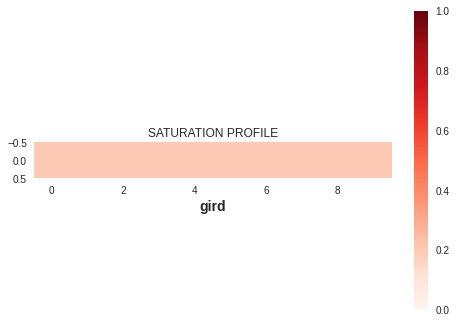

AT T=  499 Units


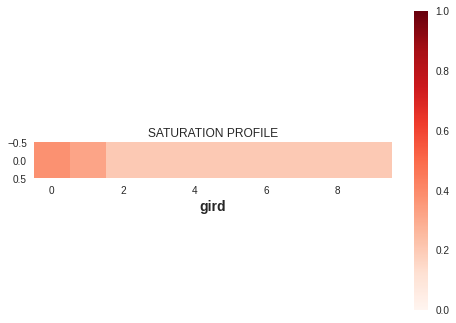

AT T=  750 Units


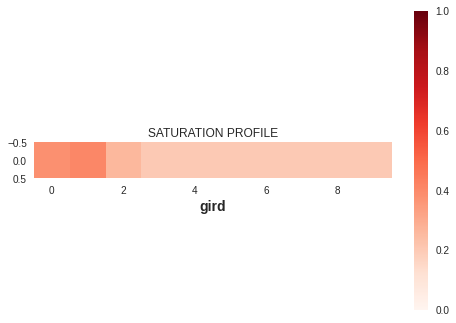

In [117]:
for t in range (1000): 
 for i in range((len(krwhalf)-2)):
   krwhalf[i+1]=0.2*(sat(i)**3)
   krohalf[i+1]=(1-sat(i))**3
 for i in range(len(thalfwater)):
   thalfwater[i]=3000*krwhalf[i]
   thalfoil[i]=3000*krohalf[i]
 for i in range ((len(thalfwater)-1)):
   Tw[i][i]=thalfwater[i]+thalfwater[i+1]
   To[i][i]=thalfoil[i]+thalfoil[i+1]
 for i in range((len(thalfwater)-2)):
   Tw[i][i+1]=-thalfwater[i+1]
   Tw[i+1][i]=-thalfwater[i+1]
   To[i][i+1]=-thalfoil[i+1]
   To[i+1][i]=-thalfoil[i+1]
 T=(Tw+((bo/bw)*To))*6.33*10**(-3)
 for i in range(n):
   D[i][i]=3.33E6*0.2*1E-5/bw
 a=T+D         #left side of the equation
 b=D@p_initial+Q #Right side of the equation
 pn1=np.linalg.solve(a,b)
 d12inv=1.406799531E-6
 swn1=sw.reshape(n,1)+d12inv*(-Tw@pn1+Qw)
 p_inital=pn1
 sw=swn1
 if(t==1 or t==499 or t==750):
  mpl.style.use('seaborn')
  print('AT T= ',t,'Units')
  plt.imshow(swn1.reshape(1,n), cmap='Reds',vmin=0,vmax=1)
  plt.title('SATURATION PROFILE')
  plt.xlabel('gird', weight='bold', fontsize=14)
  plt.colorbar()
  plt.grid(False)
  plt.show()